## Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from nltk.probability import FreqDist
import more_itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Importing the Dataset

In [ ]:
def import_dataset():
  for _ in range(4):
    uploaded = files.upload()
  income_data = pd.read_csv('income_data.csv')
  user_data = pd.read_csv('user_data.csv')
  task_data = pd.read_csv('task_data.csv')
  log_data = pd.read_csv('log_data.csv')
  return income_data, user_data, task_data, log_data

In [ ]:
income_data, user_data, task_data, log_data = import_dataset()

Saving income_data.csv to income_data.csv


Saving task_data.csv to task_data.csv


Saving user_data.csv to user_data.csv


Saving log_data.csv to log_data.csv


In [ ]:
log_data = pd.read_csv('log_data.csv')

# TASK -1
Provide with a more detailed Explarotary Analysis in the Logs Table (Previous comments, in Week 2, and do bar graphs comparin different measures per country, per task, per worker ) Take this as a guide, but feel free to dig deeper [avg scroll for each user(given uid), urls ending with 'tasks' are not currently included (they simply indicate that a user is browsing the tasks), avg interactions per task or per user, pool_id in the link ; Provide with a different granularity with the interactions (e.g. number of clicks, number of scrolls, combining clicks and scrolls)]

In [ ]:
log_data.head()

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


#### 1.1  Average scroll for each user given a user_id
(for each web request / whenever they open a new tab)
---



In [ ]:
def avg_scroll(user_id):
  log_grouped = log_data.groupby(by="uid")["scroll_count"].sum()
  print(log_grouped[user_id])

In [ ]:
avg_scroll(1699065816)

4636.0


#### 1.2 Average Interactions per task

In [ ]:
log_data.head()

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_data['event'].unique()

array(['TABUPDATED', 'WEBREQUEST', 'TABCLOSED', 'TABACTIVATED'],
      dtype=object)

In [ ]:
def interactions_per_task(url):
  new_log = log_data.merge(user_data[['uid', 'country']], how='outer', on='uid')
  new_log['url'] = new_log['url'].astype(str)
  new_log['interactions_with_tasks'] = list(map(lambda x: x.startswith('https://toloka.yandex.com/task/'), new_log['url']))
  new = new_log.loc[new_log['url'].str.startswith('https://toloka.yandex.com/task/', na=False)]
  log2 = new.groupby(by = "url")['click_count'].sum()
  interactions = log2[url]
  print("Interactions per task for the given task is "+  '\033[1m' + str(interactions))

In [ ]:
interactions_per_task("https://toloka.yandex.com/task/37408686/00023acfae--63ce403706339e0574d62b18")

Interactions per task for the given task is 6.0


#### 1.3 Average Interactions per user

In [ ]:
def avg_interaction(user_id):
  log_grouped = log_data.groupby(by="uid")["click_count"].sum()
  print(log_grouped[user_id])

In [ ]:
avg_interaction(1699065816)

162.0


#### 1.4 Visual Representation of the EDA

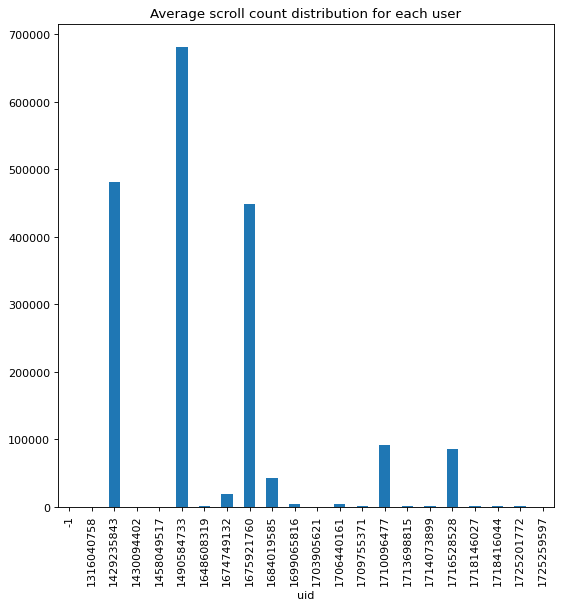

In [ ]:
## plotting average scroll count per user
log1 = log_data.groupby(by="uid")["scroll_count"].sum()
type(log1)
figure(figsize=(8, 8), dpi=80)
p1 = log1.plot(kind='bar', title='Average scroll count distribution for each user')

In [ ]:
## plotting average interactions per country
def interactions_per_country():
  new_log = log_data.merge(user_data[['uid', 'country']], how='outer', on='uid')
  new_log['url'] = new_log['url'].astype(str)
  new_log['interactions_with_tasks'] = list(map(lambda x: x.startswith('https://toloka.yandex.com/task/'), new_log['url']))
  log_grouped = new_log.groupby(by="country")['interactions_with_tasks'].sum()
  countries = user_data['country'].value_counts()
  countries.to_dict
  interaction_list = []
  for i in log_grouped.keys():
    interactions = log_grouped[i] / countries.get(i)
    interaction_list.append(interactions)
  inters = dict(zip(log_grouped.keys(), interaction_list))
  s = pd.Series(inters)
  return s

In [ ]:
inters = interactions_per_country()

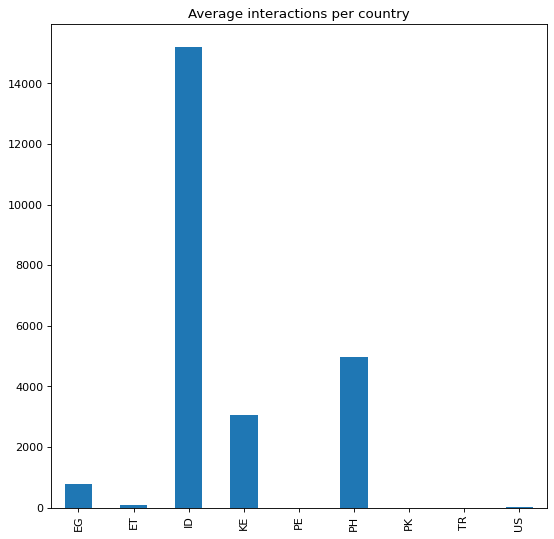

In [ ]:
figure(figsize=(8, 8), dpi=80)
p2 = inters.plot(kind='bar', title='Average interactions per country')

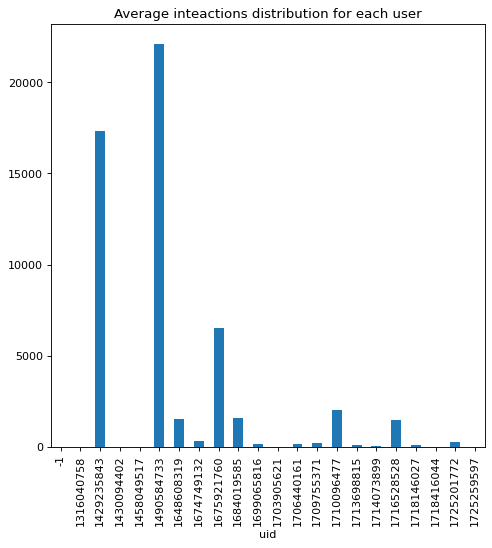

In [ ]:
## plotting average interations per user
log1 = log_data.groupby(by="uid")["click_count"].sum()
type(log1)
figure(figsize=(7, 7), dpi=80)
p1 = log1.plot(kind='bar', title='Average interactions distribution for each user')

# TASK - 2
Create a Python Script that given a worker id find the time it took to complete a task (e.g. since it started until it finished) with pool_id

In [ ]:
log_data.head()

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(30):
  print(log_data['url'][i])

https://toloka.yandex.com/signup
https://toloka.yandex.com/signup
https://toloka.yandex.com/
https://toloka.yandex.com/
https://toloka.yandex.com/tasks
https://toloka.yandex.com/tasks
NON-TOLOKA
https://toloka.yandex.com/tasks
NON-TOLOKA
https://toloka.yandex.com/tasks
NON-TOLOKA
https://toloka.yandex.com/tasks
NON-TOLOKA
https://toloka.yandex.com/tasks
NON-TOLOKA
https://toloka.yandex.com/tasks
https://toloka.yandex.com/tasks
https://toloka.yandex.com/task/34554932/00020f4434--6379322bd3a4cf6101a4e754
https://toloka.yandex.com/task/34554932/00020f4434--6379322bd3a4cf6101a4e754
NON-TOLOKA
https://toloka.yandex.com/task/34554932/00020f4434--6379322bd3a4cf6101a4e754
NON-TOLOKA
https://toloka.yandex.com/tasks
NON-TOLOKA
https://toloka.yandex.com/task/34554932/00020f4434--6379322bd3a4cf6101a4e754
https://toloka.yandex.com/task/34554932/00020f4434--6379322bd3a4cf6101a4e754
NON-TOLOKA
https://toloka.yandex.com/task/33323370/0001fc796a--6379328e8408eb4b99b377f1
https://toloka.yandex.com/task/

In [ ]:
def task_duration(pool_id):
  new = log_data.loc[log_data['url'].str.startswith('https://toloka.yandex.com/task/', na=False)]
  new['pool_id'] = new['url'].str[31:39]
  start = new.where(new['pool_id'] == pool_id)['timestamp'].dropna().values.tolist()[0]
  end = new.where(new['pool_id'] == pool_id)['timestamp'].dropna().values.tolist()[-1]
  duration = end - start
  days = duration*24/86400
  print('The time took for the given task to get completed is: ' +  '\033[1m' + str(days) +  '\033[1m' + ' hours.')

In [ ]:
task_duration('37145735')
task_duration('34554932')
task_duration('37051657')
task_duration('37394360')
task_duration('37406757')

<ipython-input-99-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


The time took for the given task to get completed is: 2056.578611111111 hours.
The time took for the given task to get completed is: 981730.92 hours.
The time took for the given task to get completed is: 991.1627777777778 hours.
The time took for the given task to get completed is: 463.2275 hours.
The time took for the given task to get completed is: 271.0697222222222 hours.


In [ ]:
task_duration('37145735')

The time took for the given task to get completed is: 2056.578611111111 hours.


<ipython-input-5-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


In [ ]:
task_duration('34554932')

The time took for the given task to get completed is: 981730.92 hours.


<ipython-input-5-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


In [ ]:
task_duration('34554932')

The time took for the given task to get completed is: 981730.92 hours.


<ipython-input-5-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


In [ ]:
task_duration('37051657')

The time took for the given task to get completed is: 991.1627777777778 hours.


<ipython-input-5-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


In [ ]:
task_duration('37394360')

The time took for the given task to get completed is: 979.625 hours.


<ipython-input-5-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


In [ ]:
task_duration('37406757')

The time took for the given task to get completed is: 271.0697222222222 hours.


<ipython-input-5-b5c8bb2d132e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['pool_id'] = new['url'].str[31:39]


# TASK - 3
Use assignment_data and tasks_data to see what features measures of a task made the worker to do a certain task. You can consider those which the worker attempted  and/or those who finish it in the income_log

In [ ]:
uploaded = files.upload()
assignment_data = pd.read_csv('assignment_data.csv')

Saving assignment_data.csv to assignment_data.csv


In [ ]:
assignment_data.head()

,Unnamed: 0,uid,project_id
0,0,1316040758,49390
1,1,1316040758,54170
2,2,1316040758,73686
3,3,1316040758,80759
4,4,1316040758,81112


In [ ]:
assignment_data.shape

(1053, 3)

In [ ]:
assignment_data['uid'].unique()

array([1316040758, 1429235843, 1430094402, 1458049517, 1490584733,
       1648608319, 1674749132, 1675921760, 1684019585, 1703905621,
       1706440161, 1709755371, 1710096477, 1713698815, 1714073899,
       1716528528, 1718146027, 1718416044, 1725201772])

In [ ]:
task_data.head()

,Unnamed: 0,project_id,pool_id,title,description,pool_startedAt,hasInstructions,mayContainAdultContent,requesterID,requesterTrusted,lang,grade,averageAcceptanceTimeSec,moneyAvgHourly,moneyMed,moneyTop10,moneyMax3,reward
0,0,0,0,title,NaN,2022-09-16T22:16:48.000Z,0,1,requesterID,1,EN,4.30,NaN,0.54,NaN,NaN,NaN,0.0
1,1,2338,36616149,Ekran görüntüsünde yetişkin içerik var mı?,"Bu, ""Ekran görüntüsünde yetişkin içerik var mı...",2022-11-29T12:19:54.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.52,NaN,0.00,0.00,0.09,1.19,0.0
2,2,2338,36760808,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-08T22:27:28.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.54,NaN,0.00,0.00,0.29,1.69,0.0
3,3,2338,36774752,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-09T21:50:47.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.51,NaN,0.00,0.00,0.09,1.19,0.0
4,4,6795,21626385,Тональность сообщений из социальных сетей,Разметка сообщений по эмоциональной окраске.,2022-10-23T22:24:44.000Z,1,1,81029b6e4b04badacad20d15ff3998e0,1,NaN,4.89,NaN,2.40,0.04,0.14,NaN,0.0


In [ ]:
def corpus(uid):
  projects = []
  for j in range(len(assignment_data)):
    if assignment_data['uid'][j] == uid:
      projects.append(assignment_data['project_id'][j])
  titles = []
  for j in range(len(task_data)):
    if task_data['project_id'][j] in projects:
      titles.append(i for i in task_data['title'][j].split(" "))
    titles = list(more_itertools.collapse(titles))
  return titles

In [ ]:
assignment_data['uid'].unique()

array([1316040758, 1429235843, 1430094402, 1458049517, 1490584733,
       1648608319, 1674749132, 1675921760, 1684019585, 1703905621,
       1706440161, 1709755371, 1710096477, 1713698815, 1714073899,
       1716528528, 1718146027, 1718416044, 1725201772])

In [ ]:
corpus(1316040758)

In [ ]:
corpus(1429235843)

In [ ]:
corpus(1675921760)

In [ ]:
corpus(1684019585)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def top_words(uid):
  projects = []
  for j in range(len(assignment_data)):
    if assignment_data['uid'][j] == uid:
      projects.append(assignment_data['project_id'][j])
  titles = []
  for j in range(len(task_data)):
    if task_data['project_id'][j] in projects:
      titles.append(i for i in task_data['title'][j].split(" "))
    titles = list(more_itertools.collapse(titles))

  sentence = " ".join(titles)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  cleantext = re.sub(r'[!,.:;-](?= |$)',r'',cleantext)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(rem_num)
  filtered_sentence = [w for w in word_tokens if len(w) > 2 if not w in stopwords.words('english')]

  fdist = FreqDist(filtered_sentence)
  top_ten = fdist.most_common(50)
  return top_ten

In [ ]:
top = top_words(1316040758)
print(top)

[('microsoft', 14), ('app', 14), ('bug', 10), ('bash', 10), ('start', 9), ('take', 6), ('photos', 6), ('face', 6), ('bing', 5), ('test', 4), ('entity', 2), ('image', 2), ('selection', 2), ('segmentation', 2), ('newbies', 2), ('🧑\u200d🎓', 2), ('make', 1), ('photo', 1), ('receipts', 1), ('send', 1), ('selfie', 1)]


In [ ]:
top = top_words(1674749132)
print(top)

[('image', 19), ('belong', 19), ('category', 19), ('take', 11), ('photos', 11), ('face', 11), ('provided', 8), ('link', 8), ('contain', 8), ('coupons', 8)]


In [ ]:
top_words(1458049517)

[('information', 14),
 ('screenshot', 11),
 ('match', 11),
 ('take', 11),
 ('photos', 11),
 ('face', 11),
 ('given', 9),
 ('updated', 9),
 ('creation', 8),
 ('english', 8)]

# TASK - 4
Use assignment_data and tasks_data to see what are the words in description of a task made the worker to do a certain task and not others

In [ ]:
task_data.head()

,Unnamed: 0,project_id,pool_id,title,description,pool_startedAt,hasInstructions,mayContainAdultContent,requesterID,requesterTrusted,lang,grade,averageAcceptanceTimeSec,moneyAvgHourly,moneyMed,moneyTop10,moneyMax3,reward
0,0,0,0,title,NaN,2022-09-16T22:16:48.000Z,0,1,requesterID,1,EN,4.30,NaN,0.54,NaN,NaN,NaN,0.0
1,1,2338,36616149,Ekran görüntüsünde yetişkin içerik var mı?,"Bu, ""Ekran görüntüsünde yetişkin içerik var mı...",2022-11-29T12:19:54.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.52,NaN,0.00,0.00,0.09,1.19,0.0
2,2,2338,36760808,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-08T22:27:28.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.54,NaN,0.00,0.00,0.29,1.69,0.0
3,3,2338,36774752,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-09T21:50:47.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.51,NaN,0.00,0.00,0.09,1.19,0.0
4,4,6795,21626385,Тональность сообщений из социальных сетей,Разметка сообщений по эмоциональной окраске.,2022-10-23T22:24:44.000Z,1,1,81029b6e4b04badacad20d15ff3998e0,1,NaN,4.89,NaN,2.40,0.04,0.14,NaN,0.0


## WordCloud

In [ ]:
def build_wordcloud(uid):
  top = top_words(uid)
  d = dict(top)
  wordcloud = WordCloud(background_color='thistle')
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

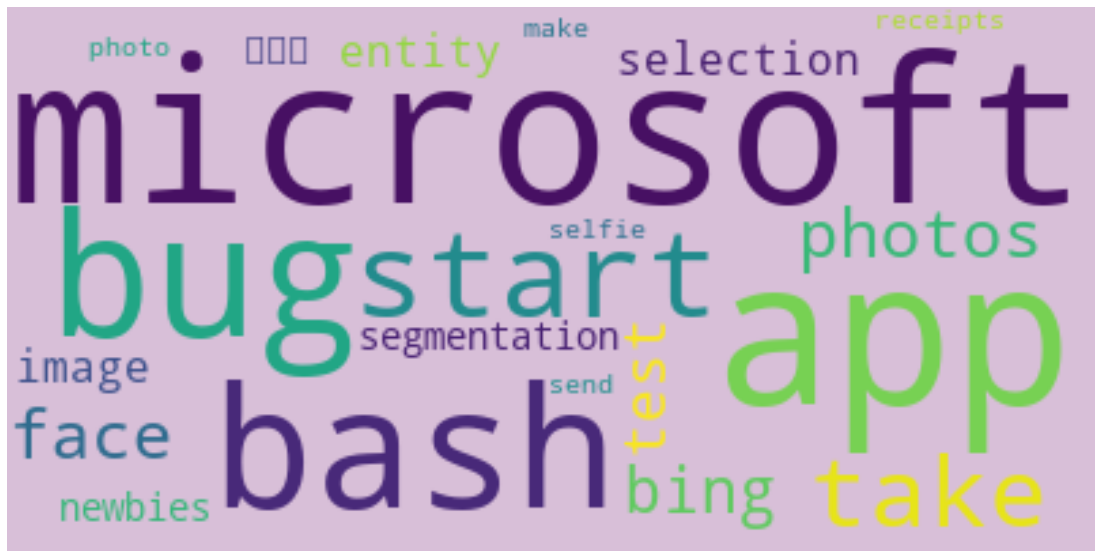

In [ ]:
build_wordcloud(1316040758)

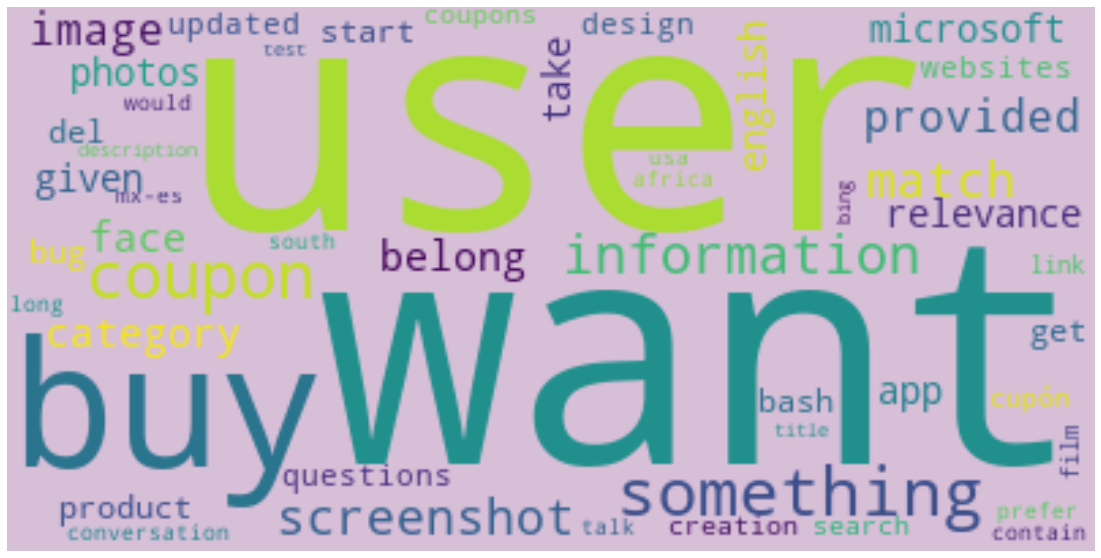

In [ ]:
build_wordcloud(1675921760)

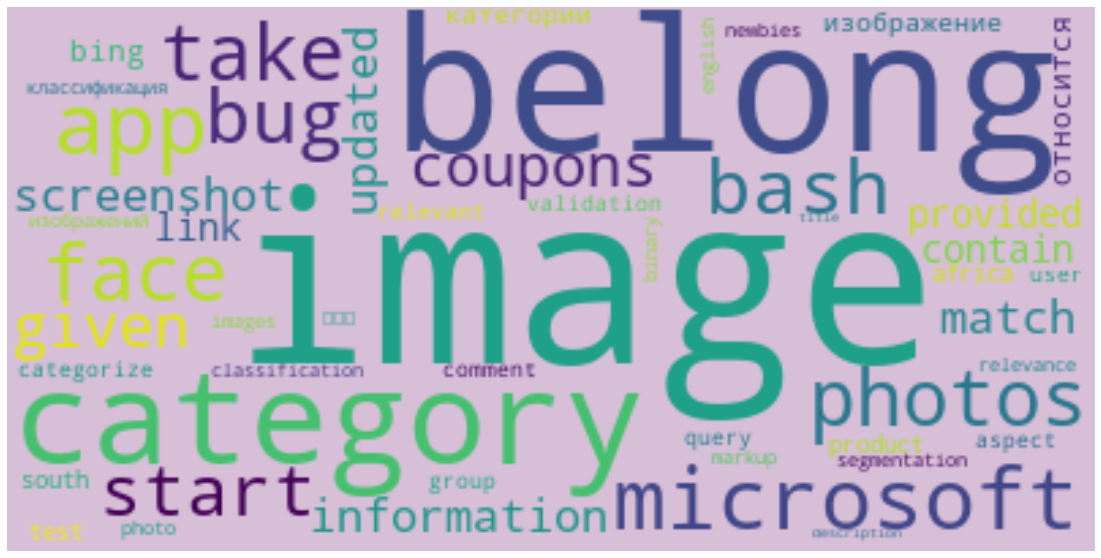

In [ ]:
build_wordcloud(1429235843)

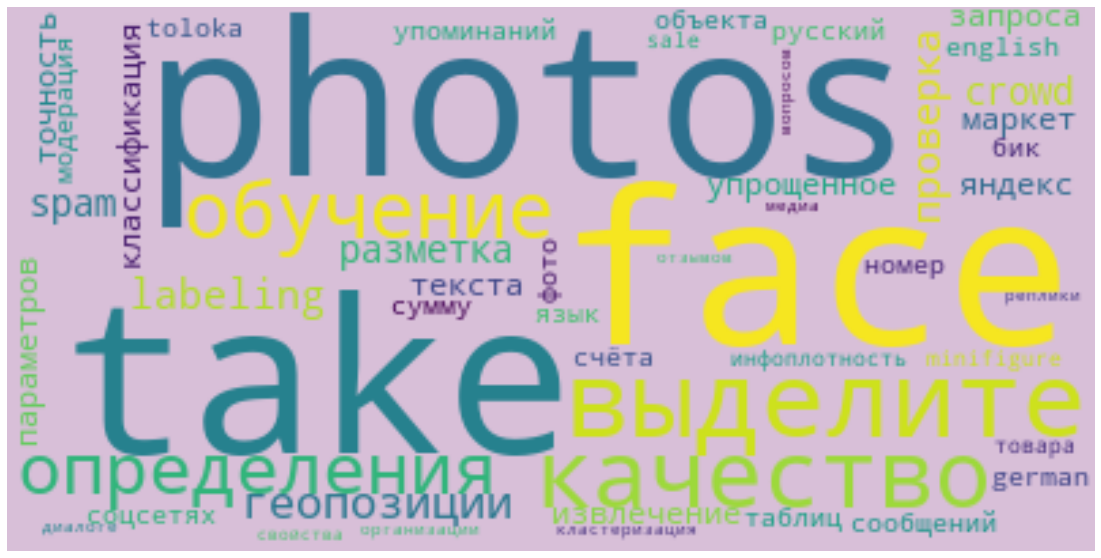

In [ ]:
build_wordcloud(1430094402)

In [ ]:
assignment_data['uid'].unique()

array([1316040758, 1429235843, 1430094402, 1458049517, 1490584733,
       1648608319, 1674749132, 1675921760, 1684019585, 1703905621,
       1706440161, 1709755371, 1710096477, 1713698815, 1714073899,
       1716528528, 1718146027, 1718416044, 1725201772])

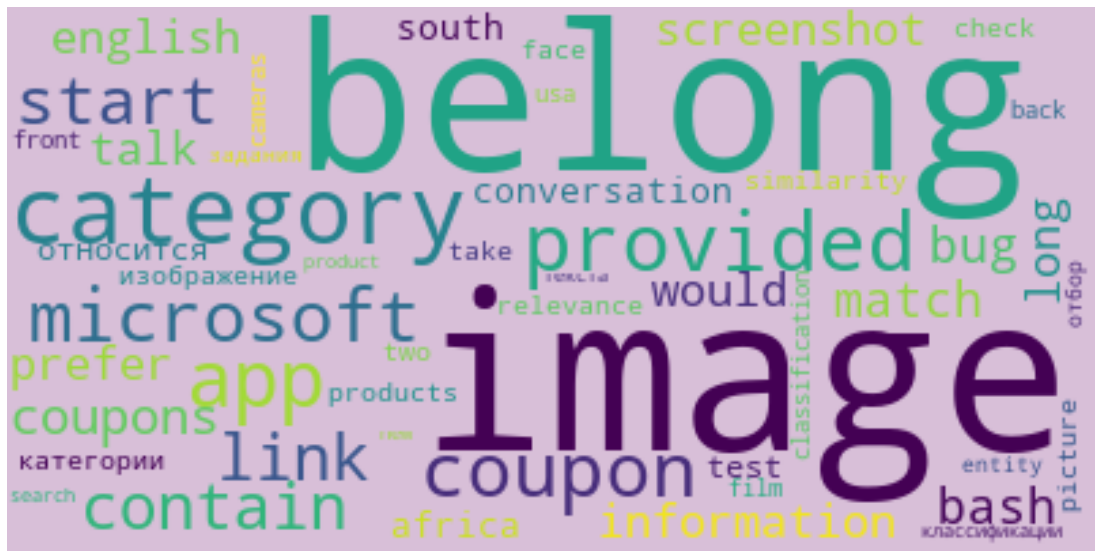

In [ ]:
build_wordcloud(1725201772)

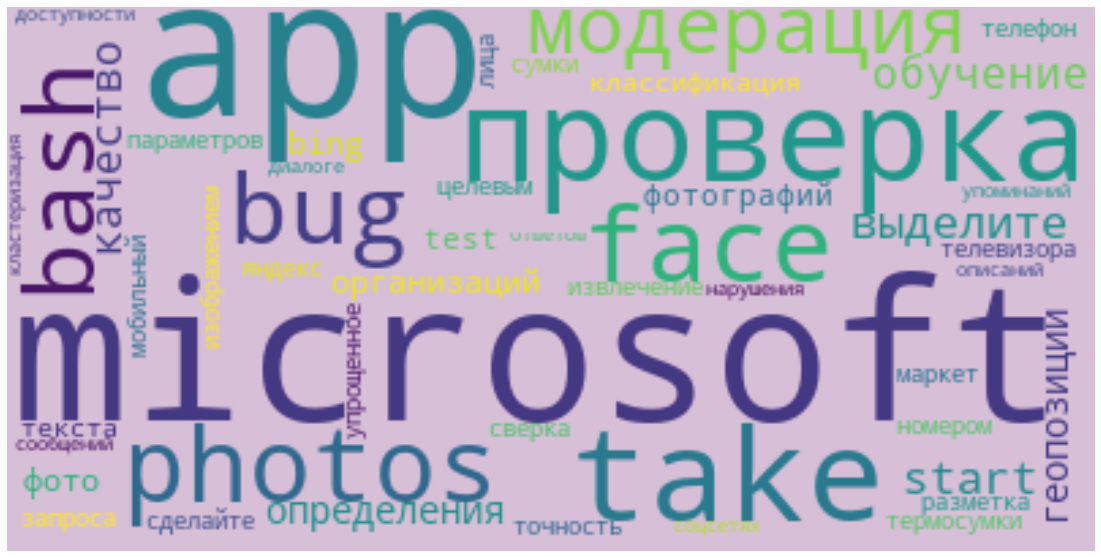

In [ ]:
build_wordcloud(1714073899)

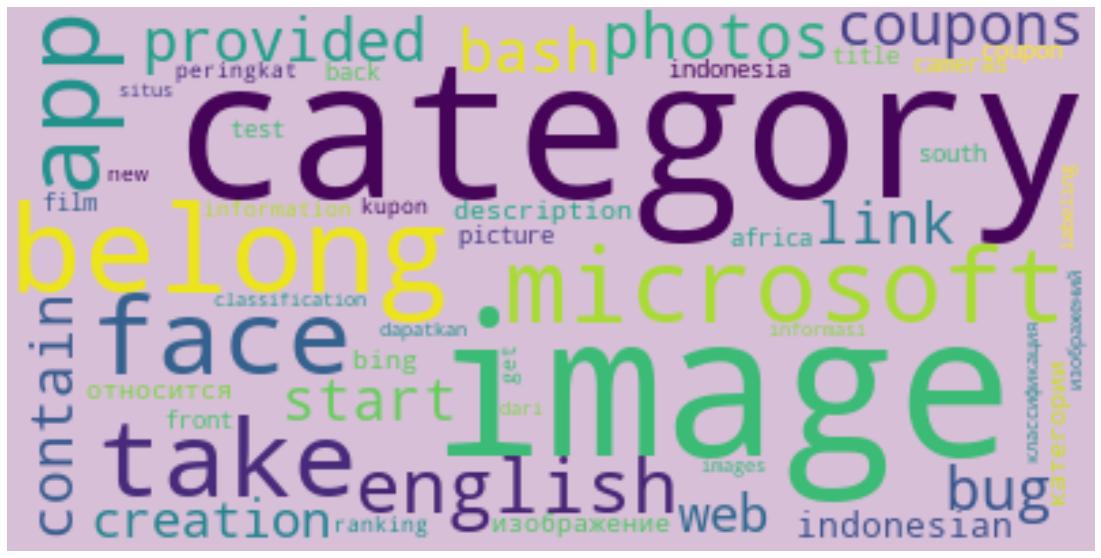

In [ ]:
build_wordcloud(1490584733)

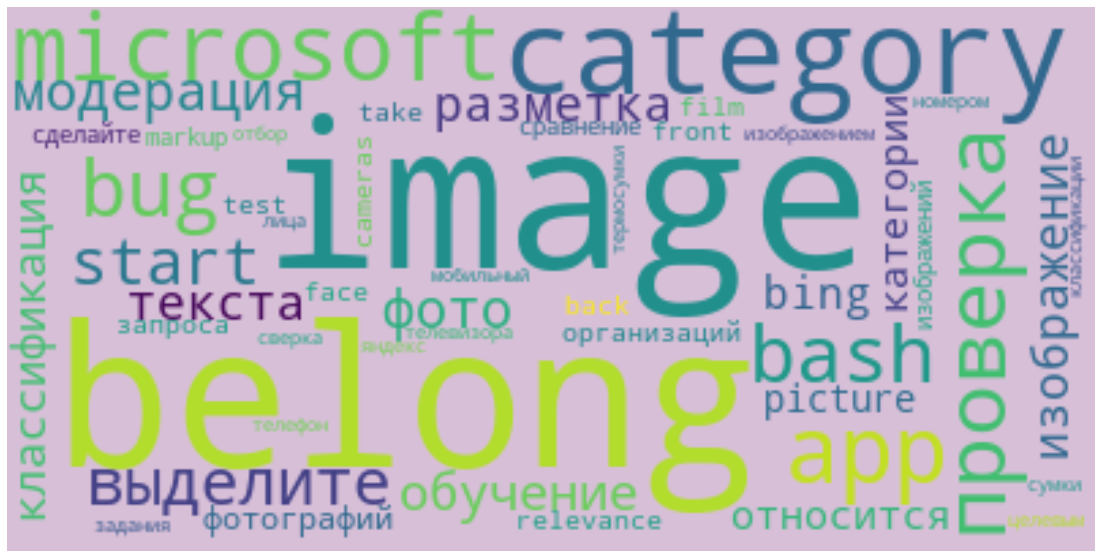

In [ ]:
build_wordcloud(1648608319)